In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

1/1 [==============================] - 1s 1s/step


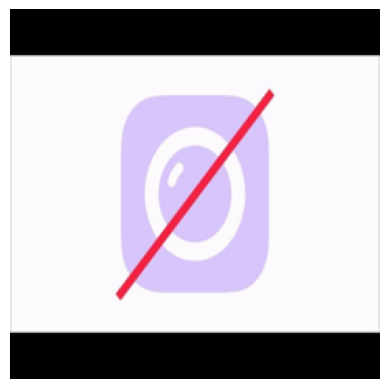

analog_clock:27.86%


In [8]:
import numpy as np # 필요한 라이브러리 가져오기
import matplotlib.pyplot as plt
from PIL import Image
from keras.api._v2.keras.preprocessing import image as keras_image
from keras.api._v2.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
model = MobileNetV2(weights='imagenet') # 사전 학습된 MobileNetV2 모델 사용
img = Image.open('./photo.jpg') # 불러올 이미지 경로 입력. jpg만 가능함에 주의
img = img.resize((224, 224)) # 이미지 전처리. 224x224 크기로 변경
img_array = keras_image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
predictions = model.predict(img_array) # 이미지 분류 예측
label = decode_predictions(predictions)
plt.imshow(img) # 예측 결과 시각화
plt.axis('off')
plt.show()
print("{}:{:.2f}%".format( label[0][0][1], label[0][0][2]*100 ))